# Analysis Data Project: Bike Sharing
- **Name:** Santanam Wishal
- **Email:** santawishal17@gmail.com
- **ID Dicoding:** kianaaa19

## Defining the Business Question

---



- Question 1: Is there a connection between weather conditions and the number of bicycle users?  
- Question 2: What are the patterns of bicycle usage on weekdays, holidays, and regular days?  
- Question 3: Which year had more bicycle users, 2011 or 2012?  
- Question 4: Is there a correlation between weather variables (such as air temperature, perceived temperature, and humidity) and the total number of bicycle users?  
- Question 5: Does seasonality influence bicycle rentals for both Casual and Registered customers?  

## Import All Packages/Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [10]:
# Import day.csv dan hour.csv
#day_df = pd.read_csv("/data/day.csv")
day_df = pd.read_csv("https://raw.githubusercontent.com/kianaaa19/bike-sharing-rentals/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [11]:
# Data type , Missing values , Duplicates , Abnormalities checking
#day_df
day_df.info()
day_df.isna().sum()
day_df.duplicated().sum()
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [12]:
# Delete unused columns
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

# Rename columns
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

# Rename Integer into String
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Change Datatype to Datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Change Datatype to Categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## Exploratory Data Analysis (EDA)

Explore Data day_df

In [13]:
# Group By Month
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-13-5b91db9ed4eb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

From the findings presented, it can be concluded that **June** has the highest average and total number, whereas **January** has the lowest average and total number.

In [14]:
# Group By Weather Condition
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-14-a06381d1c10a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

The results indicate that bicycle rentals are more common during **sunny** or **cloudy** weather, with very few rentals occurring during snow and none during extremely adverse weather conditions.

In [15]:
# Group By Holiday
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-15-e6fb4f09fad8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

The results suggest that bicycle renters generally prefer to rent bicycles on non-holiday days, particularly on **weekdays**.

In [16]:
# Group By Weekday
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

<ipython-input-16-d48fa523c8c7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

The results show that the average number of renters, ranked from highest to lowest, is as follows: **Friday** (Fri), **Thursday** (Thu), **Saturday** (Sat), **Wednesday** (Wed), **Tuesday** (Tue), **Monday** (Mon), and **Sunday** (Sun).

In [17]:
# Group By Working Day
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

<ipython-input-17-ca6c1b2e4e44>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

The results indicate that the highest number of bike rentals occurs on working days compared to non-working days. However, the difference between the two is relatively small.

In [18]:
# Group By Season
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-18-b19f019c20b6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

The analysis shows that both Casual and Registered bicycle renters favor **autumn** (Fall), as reflected in the highest average rentals. Conversely, **spring** records the lowest average, making it the least preferred season.

In [19]:
# Group Temperature ,  Apparent Temperature , Humidty By Season
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

<ipython-input-19-1b9c3ea1aa1c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

From the analysis, the following conclusions can be drawn:  

- The highest average temperature and felt temperature (**atemp**) occur in **autumn** (fall), followed by summer, winter, and spring.  
- The highest average humidity is recorded in the winter season, followed by **fall**, summer, and spring.

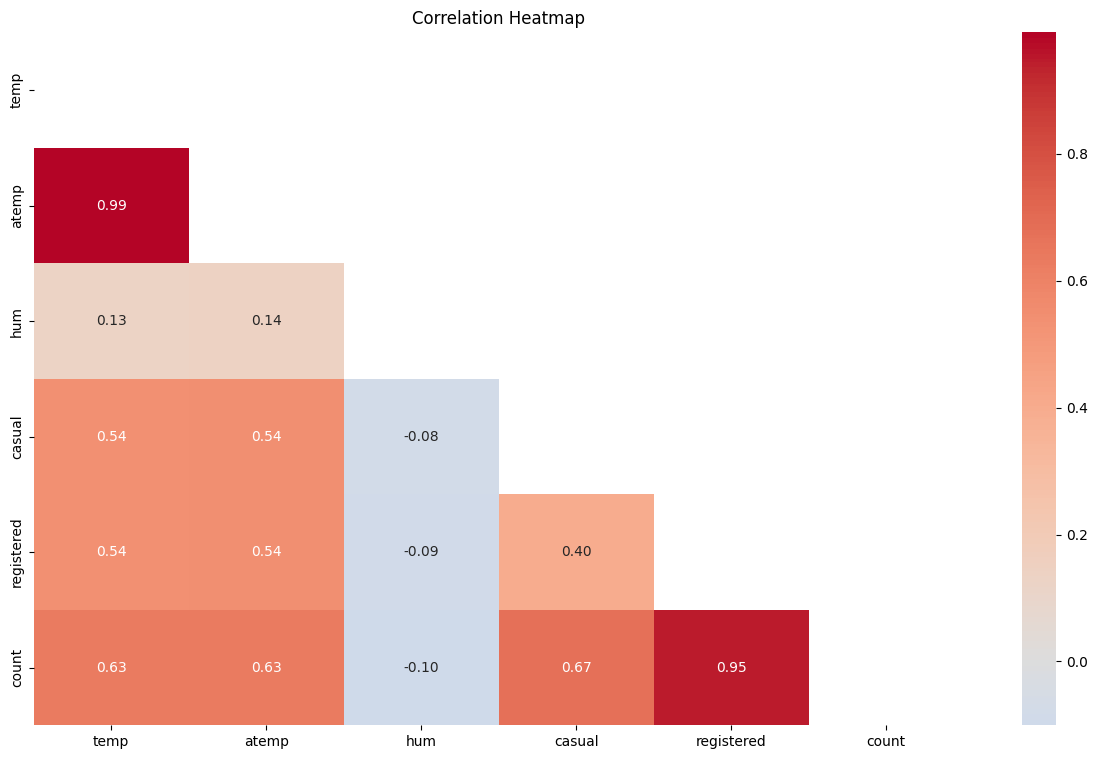

In [20]:
# Correlation Casual & Registered Users and Count
fig, ax = plt.subplots(figsize=(15,9))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Based on the analysis, the following correlations are observed:

- **atemp** and **temp** have a very high correlation of 0.99.
- **hum** shows a weak correlation with **temp** and **atemp** (0.13 and 0.14, respectively).
- **casual** is moderately correlated with **temp** and **atemp** (0.54) and shows a slight negative correlation with **hum** (-0.08).
- **registered** follows a similar pattern to **casual**, with a moderate correlation of 0.40 with **casual**.
- **count** has strong correlations with **temp**, **atemp**, **casual**, and **registered** (0.63, 0.63, 0.67, and 0.95, respectively), and a slight negative correlation with **hum** (-0.10).

## Visualization & Explanatory Analysis

### Question 1: Is there a connection between weather conditions and the number of bicycle users?

<ipython-input-31-477300366b63>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


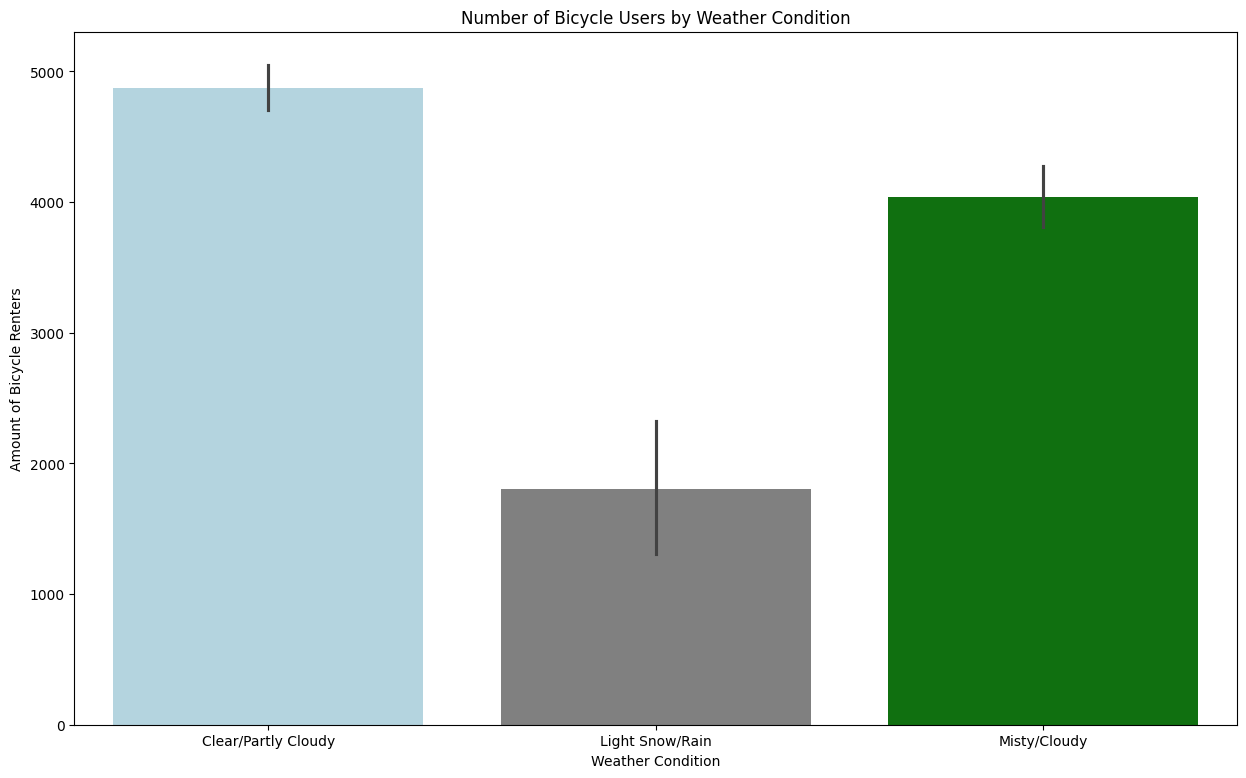

In [31]:
plt.figure(figsize=(15, 9))

# Specify the colors for each bar
colors = ['lightblue', 'grey', 'green']

sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df,
    palette=colors  # Apply the color palette
)

plt.title('Number of Bicycle Users by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Amount of Bicycle Renters')
plt.show()

From the boxplot visualizations, it can be concluded that weather conditions play a significant role in bicycle rentals. The most favorable conditions for renting are when the weather is sunny or partly cloudy, followed by foggy or cloudy weather. The least desirable conditions for renting occur when the weather is slightly snowy or rainy.

### Question 2: Question 2: What are the patterns of bicycle usage on weekdays, holidays, and regular days?

<ipython-input-32-bc446f76981f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-32-bc446f76981f>:30: UserWarning: The palette list has more values (731) than needed (7), which may not be intended.
  sns.barplot(


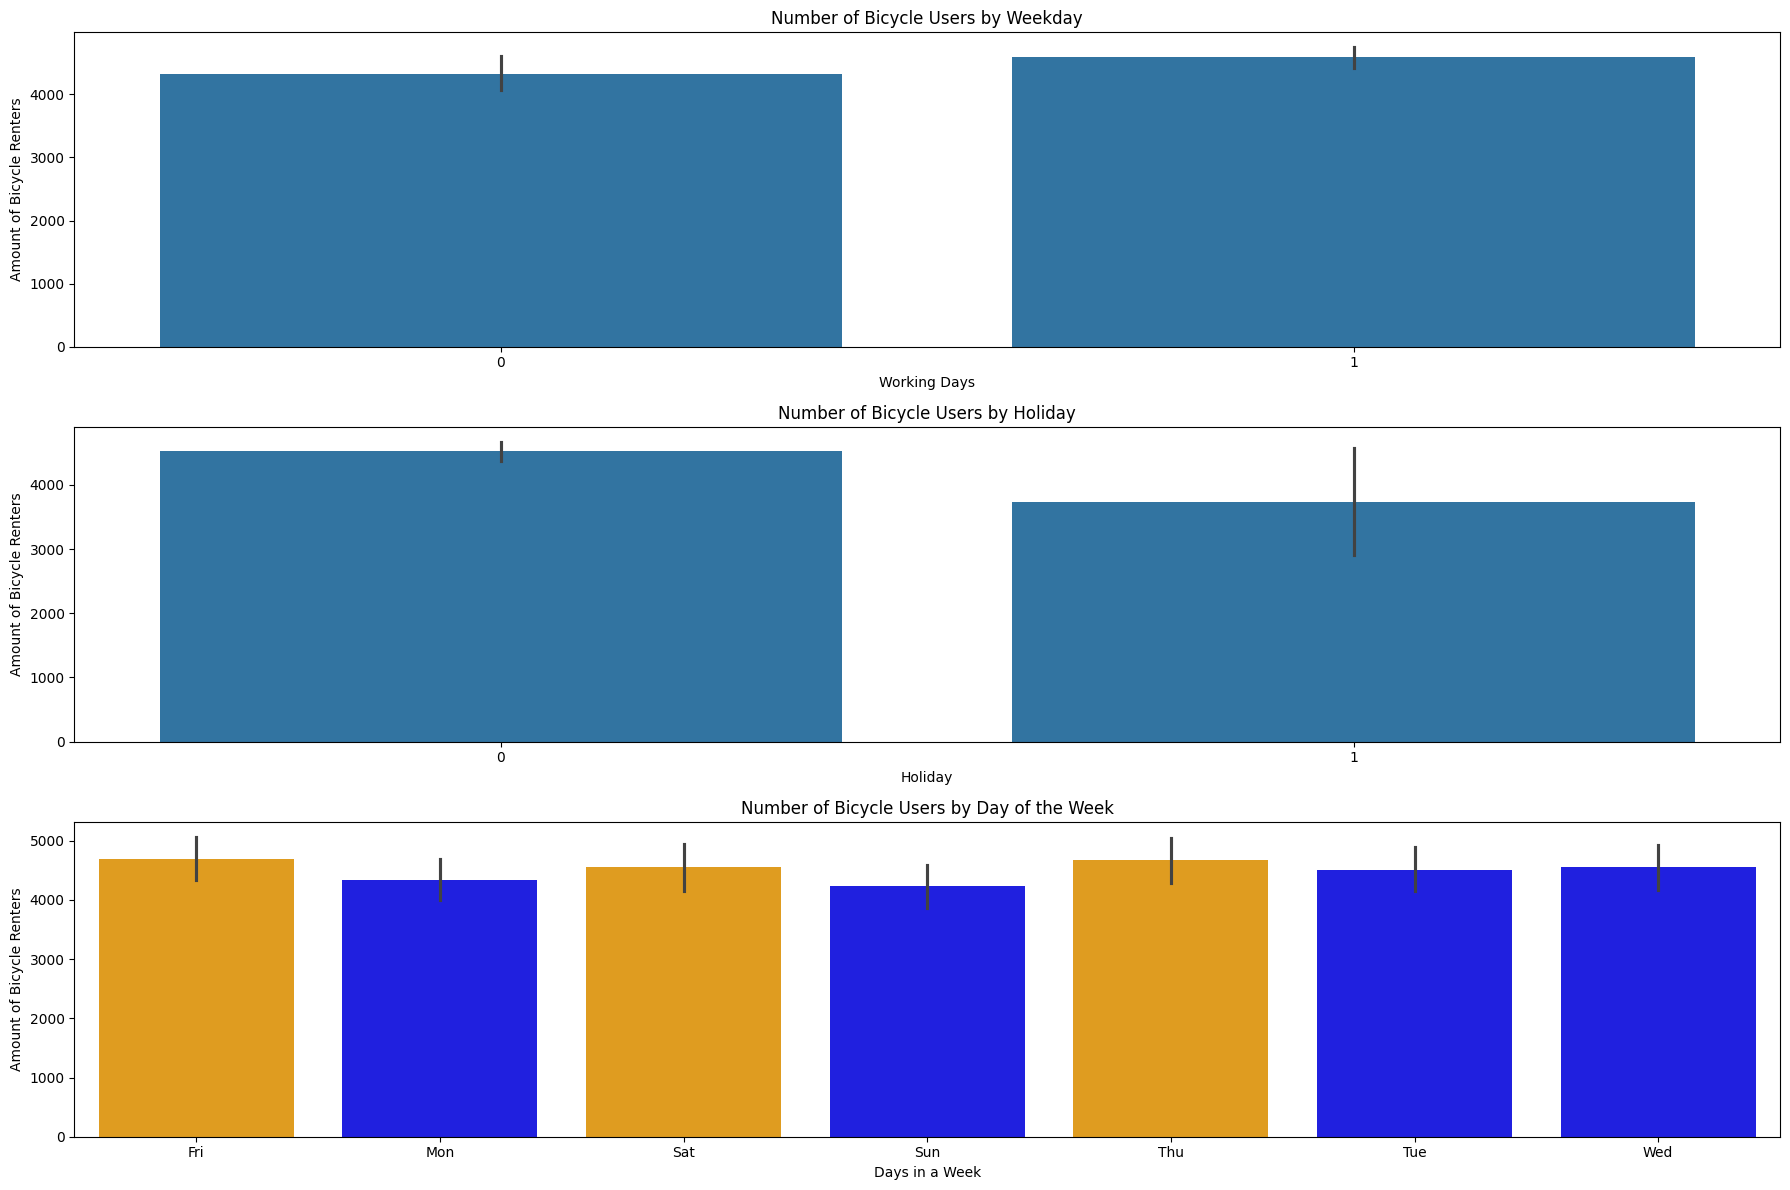

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 12))

# Based on workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Number of Bicycle Users by Weekday')
axes[0].set_xlabel('Working Days')
axes[0].set_ylabel('Amount of Bicycle Renters')

# Based on holiday
sns.barplot(
    x='holiday',
    y='count',
    data=day_df,
    ax=axes[1])
axes[1].set_title('Number of Bicycle Users by Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Amount of Bicycle Renters')

# Based on weekday
def assign_colors(day):
    return 'orange' if day in ['Wed', 'Mon', 'Sat'] else 'blue'

# Add color
day_df['color'] = day_df['weekday'].apply(assign_colors)

sns.barplot(
    x='weekday',
    y='count',
    data=day_df,
    ax=axes[2],
    palette=day_df['color'].tolist()
)
axes[2].set_title('Number of Bicycle Users by Day of the Week')
axes[2].set_xlabel('Days in a Week')
axes[2].set_ylabel('Amount of Bicycle Renters')

plt.tight_layout()
plt.show()


Based on the barplot visualizations, the following conclusions can be drawn:

- The number of bicycle renters is higher on weekdays (Monday to Friday) compared to weekends (Saturday and Sunday), with 0 indicating the weekend and 1 indicating a weekday.
- Bicycle rentals are significantly higher on weekdays (non-holidays) than on national holidays.
- **Friday** has the highest number of bicycle renters, while **Sunday** has the lowest.

### Question 3: Which year had more bicycle users, 2011 or 2012?

<ipython-input-27-af09628ff4de>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({


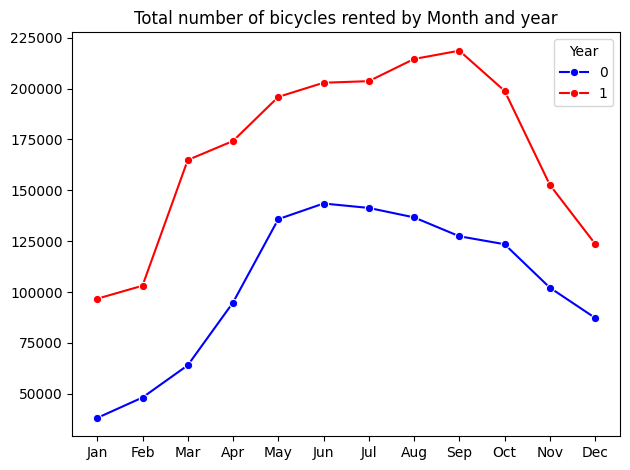

In [27]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

palette = ['blue', 'red']  # Define colors for the two lines

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette=palette,  # Apply the custom palette
    marker="o"
)

plt.title("Total number of bicycles rented by Month and year")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

From the lineplot visualization, it can be concluded that the year 2012 (represented by the number 1) consistently outperformed 2011 throughout the year. The peak of bicycle rentals in 2012 occurred in September, with January being the quietest month. In contrast, 2011 saw its highest number of bike rentals in June and the least rentals in January.

### Question 4: Is there a correlation between weather variables (such as air temperature, perceived temperature, and humidity) and the total number of bicycle users?

Text(0.5, 1.0, 'Humidity vs Count')

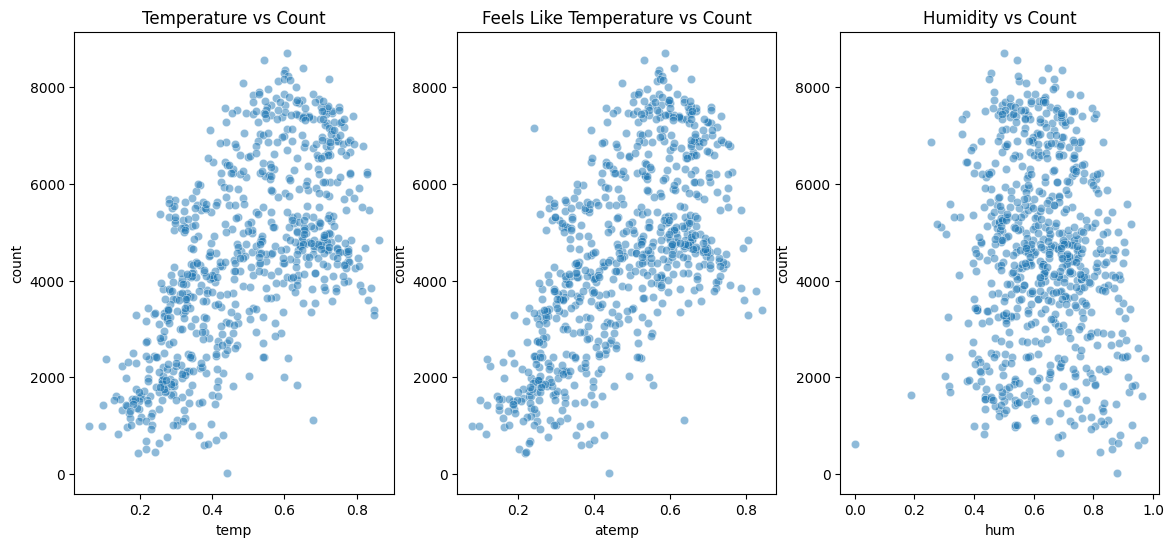

In [28]:
plt.figure(figsize=(14, 6))

# Scatter plot for 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot for 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot for 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

Based on the scatter plot analysis, the following conclusions can be drawn:

- There is a positive correlation between **temp** and **count**, meaning that as temperature increases, the number of bicycle rentals also tends to increase.
- Similarly, **atemp** and **count** also show a positive correlation, with higher **atemp** values associated with more bicycle rentals.
- The relationship between **hum** and **count** shows a slightly negative correlation, but the effect is not significant as the lean to the left is minimal.
  
In summary, an increase in temperature (**temp** and **atemp**) tends to lead to more bicycle rentals, while humidity has a minimal negative impact on the number of rentals.

### Question 5: Does seasonality influence bicycle rentals for both Casual and Registered customers?

<ipython-input-30-cf1d03700648>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


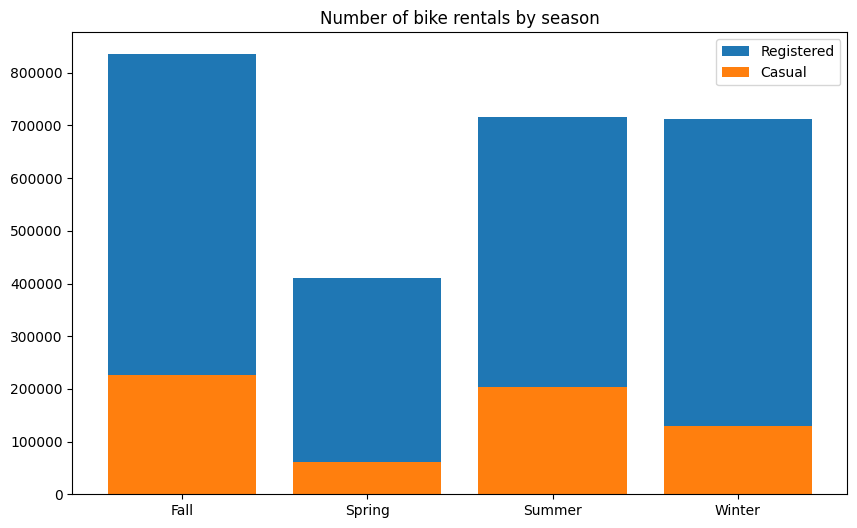

In [30]:
# Grouping data by season and calculating the number of registered and unregistered uses
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Create Bar Plot
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of bike rentals by season')
plt.legend()
plt.show()

Based on the barplot analysis, it can be concluded that **autumn** (Fall) is the most preferred season for cyclists (both Casual and Registered), followed by **summer** (Summer), **winter** (Winter), and finally, **spring** (Spring), which is the least favored season.

## Conclusion

Summary:

- **Conclusion for Question 1:** A clear relationship exists between weather conditions and bicycle rentals. Cyclists prefer Sunny/Slightly Cloudy weather, with Q3 above 6000, Q1 below 4000, and a median near 5000. The second preference is for Foggy/Cloudy weather, with Q3 above 5000, Q1 below 3000, and a median above 4000. The least favored weather is Slightly Snowy/Rainy, with Q3 above 2000, Q1 below 1000, and a median above 1000. Data is unavailable for major storm conditions, as cycling is not possible during such weather.

- **Conclusion for Question 2:** The data divides conditions into three categories. For working days, they outperform non-working days, though the difference is not highly significant, with both being above 4000 users. Regarding holidays, non-holidays show a significant increase in rentals compared to holidays, suggesting that users prefer renting bicycles on weekdays. Based on the weekdays, **Friday** ranks first with an average of 4690.29, while **Sunday** ranks last with an average of 4228.83.

- **Conclusion for Question 3:** The visualizations reveal that both 2011 and 2012 show differences in peak and base months. The peak month in 2011 was June, and the base month was January. In 2012, the peak month shifted to September, but January remained the base month. The total number of bicycle rentals in 2012 was consistently higher than in 2011.

- **Conclusion for Question 4:** The visualizations indicate that both **temp** and **atemp** have a positive correlation with **count**, meaning that as temperature increases, so does the number of bicycle users. Conversely, **humidity** shows a negative correlation with **count**, although this effect is minimal, suggesting that higher humidity slightly reduces bicycle rentals.

- **Conclusion for Question 5:** The final visualization revealed an unexpected result: **Spring** was the least popular season for bicycle rentals, not **Winter**. This could be influenced by various factors like weather conditions, air temperature, and whether it was a working day or holiday. **Autumn** (Fall) was the top season, achieving over 800,000 bike rentals.

The analysis highlights key patterns and preferences related to bicycle rentals.

- Weather Impact: Cyclists prefer Sunny/Slightly Cloudy weather, followed by Foggy/Cloudy conditions. Rentals are least frequent during Slightly Snowy/Rainy weather, with no data available for storm conditions.

- Weekday vs Weekend Rentals: Rentals are higher on weekdays, especially Fridays, with a slight preference for non-holiday weekdays over holidays. Sunday is the least popular day for rentals.

- Yearly Comparison: 2012 outperformed 2011 in terms of total bike rentals, with June being the peak month in 2011 and September in 2012. January was the lowest for both years.

- Temperature and Humidity: There is a positive correlation between temperature (temp and atemp) and bicycle rentals, while humidity shows a minimal negative impact on rentals.

- Seasonal Preferences: Autumn (Fall) is the most favorable season for cyclists, with Spring being the least popular. This could be influenced by various factors like weather conditions and holidays.

Overall, weather conditions, weekdays, and temperature play significant roles in influencing bicycle rental behaviour